# Machine Learning e o Sklearn

Vamos agora iniciar os trabalhos no campo do aprendizado de maquina e modelagem. Uma habilidade importantissima na área da ciência de dados é a capacidade de compressão e aferimento de informações. Dado uma esrutura de dados arbitrária, gostariamos de poder inferir informações desta estrutura de forma eficiente e correta. Para isso, utilizamos de metodos de compressão de dados, como modelos matemáticos, para comprimir esta informação de uma forma que torne sua aferição mais eficiênte do que se tivessemos que procurar nos dados pelos K vizinhos mais proximos, por exemplo. Muitos algoritmos diferentes de compressão e aferição estao disponíveis, e cada tarefa tem algum algoritmo ótimo que lhe serve. Neste contexto, o "*No Free Lunch theorem*" diz que, a priori, nenhum algoritmo de *machine learning* será melhor do que os outros, e apenas o teste pode revelar o algoritmo ótimo para dada tarefa.

Dentre os problemas envolvendi *machine learning*, fazemos três subdivisões:

- *Supervised Learning*, ou aprendizado supervisionado
- *Unsupervised Learning*, ou aprendizado não supervisionado
- *Reinforcement Learning*, ou aprendizado por reforço

Problemas de apendizado de funções de mapeamento entre variáveis de entrada e variáveis alvo com sinal de supervisão se enquandram na classe de *Supervised Learning*, e é deste tipo de problema que trataremos a seguir. Como curiosidade introdutória, algoritmos de *Unsupervised Learning* aprendem classificações (ou reduções) de pontos de dados a partir de suas propriedades inerentes e sem sinal de supervisão (variável alvo). Já os algoritmos destinados a resolver problemas de *Reinforcement Learning* aprendem representações de valor de estados do ambiente e politicas de agentes baseados em sinais de reforço obtidos do ambiente no qual estes agentes estão inseridos.

Dentre os problemas presentes no campo do apredizado supervisionado fazemos duas subdivisões, são elas problemas de regressão e de classificação. Modelos de regressão tem como saída variáveis geralmente continuas, e tentam prever o valor destas variáveis dadas variáveis de entradas independentes. Modelos de classificação, dadas determinadas entradas, tem como saída a probabilidade de dada amostra pertencer um classe Y dentre N possíveis classes.

Para exemplificar, vamos programar alguns modelos básicos.

No contexto de regressão, um dos modelos mais simples e muito utilizado é a [regressão linear](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression). O algoritmo utilizado para otimizar o modelo, neste caso, é o "[*Ordinary Least Squares*](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)". Muitos outros algoritmos de otimização estão disponíveis e falaremos sobre eles mais tarde. Vamos utilizar o API do [Sklearn](http://scikit-learn.org/stable/index.html) que já contém uma variedade de modelos de aprendizado de maquina implementados e prontos para serem empregados.

Inicialmente, vamos carregar o banco de dados a ser utilizado:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Carrega um dataset de exemplo, neste caso, dados de diabetes em pacientes americanos
diabetes = datasets.load_diabetes()

# Armazena as variáveis independentes para serem utilizadas de entrada no modelo
diabetes_X = diabetes.data[:, np.newaxis, 2]

print("Exemplo dos dados de variaveis independentes:\n",diabetes_X[:5])

print("\nExemplo dos dados de variaveis alvo:\n", diabetes.target[:5])

Exemplo dos dados de variaveis independentes:
 [[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]

Exemplo dos dados de variaveis alvo:
 [151.  75. 141. 206. 135.]


Para validar o modelo após o treinamento é necessário que se conserve amostras dos dados inéditas ao modelo, de forma que suas previsões utilizadas na validação sejam feitas em pontos de dados nunca antes vistos. Fazemos isto para obter uma medida de quão bem nosso modelo generaliza a estrutura presente depois do treinamento, dadas nova amostras de dados.
Subdividimos então nossos dados em dados de treino e dados de validação:

In [2]:
# Divide as entradas em dados de treino e dados de teste. Isto é necessário para verificar o aprendizado do modelo
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Divide os dados alvo em treino e teste
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

Com os dados preparados, vamos instanciar o modelo desejado e ajustar esta instancia do modelo nos dados de treinamento.

### Regressão Linear

In [3]:
# Instancia o modelo linear do Sklearn como um objeto modelo regr
regr = linear_model.LinearRegression()

# Treina o modelo utilizando "Ordinary Least Squares"
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Finalizado o treinamento, podemos testar nosso modelo treinado com os dados de teste.

Coeficientes da regressão: 
 [938.23786125]
Erro quadrático médio: 2548.07
Variancia explicada: 0.47


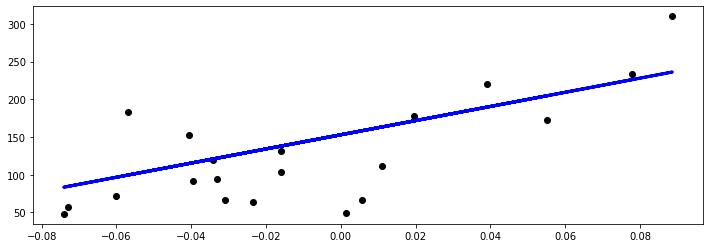

In [4]:
# Coeficientes da regressão
print('Coeficientes da regressão: \n', regr.coef_)
# Erro quadrático medio
print("Erro quadrático médio: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)) # adquire previsão do modelo para os dados
                                                                         # teste e calcula o erro medio quadrático
# Variancia explicada pelo modelo, 1 é o melhor score possível
print('Variancia explicada: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot
plt.figure(1, figsize=(12,4)) # define a figura e suas propriedades, como numero e tamanho
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.show()

O modelo linear ajusta $ y = \beta x + \alpha $ aos pontos de dados. Mais tarde falaremos sobre análise dos residuais e sobre como descobrir se o seu modelo se ajustou bem aos dados ou não, e ainda mensurar sua capacidade de generalização.

No contexto de classificação, um dos modelos mais simples e muito utilizados é a [regressão logística](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression). O algoritmo utilizado para otimizar o modelo, neste caso, é também o "[*Ordinary Least Squares*](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)".

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

print("Exemplo dos dados de variaveis independentes:\n", X[:5])

print("Exemplo dos dados de variaveis alvo:\n", y[:5])

Exemplo dos dados de variaveis independentes:
 [[-2.38519938  0.02641654]
 [-1.74830343 -1.4226907 ]
 [-2.45431681 -1.46071435]
 [ 1.87438706 -0.16039893]
 [-0.48564039  2.81507798]]
Exemplo dos dados de variaveis alvo:
 [0 0 0 2 1]


### Regressão Logística

Score de treino : 0.995 (multinomial)


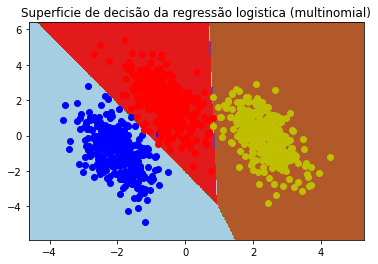

In [6]:
# Instancia e treina regressao logistica nos dados
clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class='multinomial').fit(X, y)

# Exibe score de treinamento
print("Score de treino : %.3f (%s)" % (clf.score(X, y), 'multinomial'))

# Plotando resultado da classificação
h = .02  # step size da mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plota as fronteiras de decisão das classes
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Superficie de decisão da regressão logistica (%s)" % 'multinomial')
plt.axis('tight')

# Plota os pontos de treino para visualização
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

A matemática por trás destes modelos é simples e pode ser encontrada em muitas maravilhosas fontes espalhadas pela internet, incluindo na própria [documentação](http://scikit-learn.org/stable/index.html) do Sklearn.

Uma infinidade de modelos mais avançados esta prontamente disponível, com API semelhante aos dos modelos anteriores, no Sklearn.

Um pequeno exemplo:

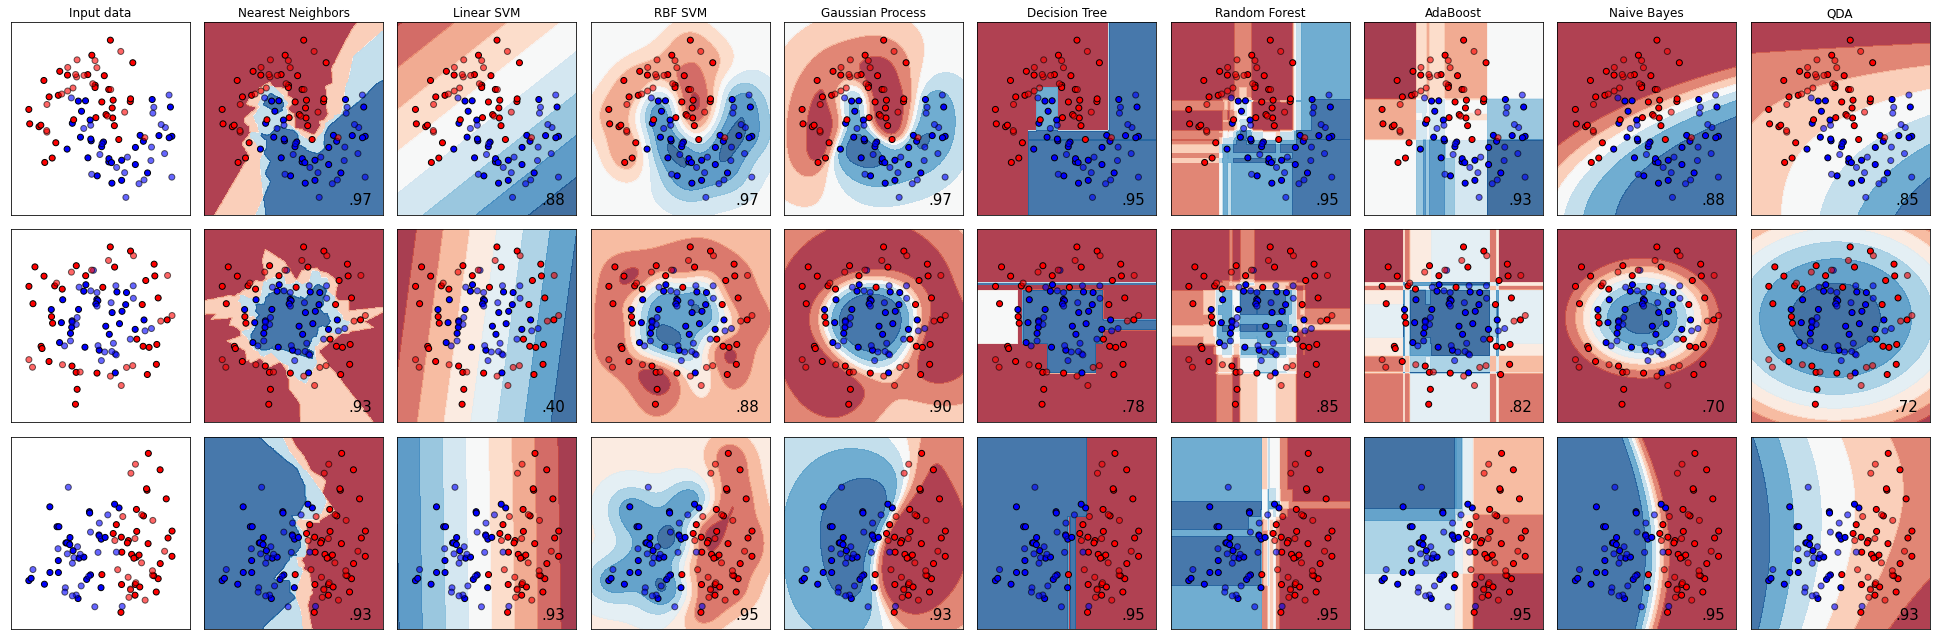

In [7]:
# Code source: Gaël Varoquaux
#              Andreas Müller

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

[Retornar para o sumário](./index.html)